##### Copyright 2024 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Code Execution in the Gemini API

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Code_Execution.ipynb"><img src="https://github.com/google-gemini/cookbook/blob/main/images/colab_logo_32px.png?raw=1" />Run in Google Colab</a>
  </td>
</table>


The Gemini API [code execution](https://ai.google.dev/gemini-api/docs/code-execution) feature enables the model to generate and run Python code based on plain-text instructions that you give it. It can learn iteratively from the results until it arrives at a final output.

This notebook is a walk through of how to use this feature.

### Set up

In [2]:
!pip install -U -q google-genai

In [3]:
from google import genai
genai.__version__

'1.1.0'

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see the [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) quickstart for an example.

In [4]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Enable code execution on the model

You can enable code execution on the model, as shown here:

In [5]:
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

response = client.models.generate_content(
  model='gemini-2.0-flash',
  contents='What is the sum of the first 50 prime numbers? '
           'Generate and run code for the calculation, and make sure you get all 50.',
  config=types.GenerateContentConfig(
    tools=[types.Tool(
      code_execution=types.ToolCodeExecution()
    )]
  )
)

The model returns a list of parts including `text`, `executable_code`, `code_execution_result`, and `inline_data`. Exactly one field within a Part is set, the rest is `None`. Let's look at all possible fields of one part:

In [6]:
print(response.candidates[0].content.parts)

[Part(video_metadata=None, thought=None, code_execution_result=None, executable_code=None, file_data=None, function_call=None, function_response=None, inline_data=None, text="Okay, I understand. I need to find the first 50 prime numbers and then calculate their sum. Here's my plan:\n\n1.  **Generate Prime Numbers:** I'll create a function to generate prime numbers.  I'll start checking numbers from 2 onwards. A number is prime if it's only divisible by 1 and itself.\n2.  **Store Primes:**  I'll store the prime numbers I find in a list until I have 50 of them.\n3.  **Calculate the Sum:** Once I have the first 50 prime numbers, I'll calculate their sum.\n4.  **Report:** Finally, I'll report the list of the first 50 primes and their sum.\n\nHere's the Python code:\n\n"), Part(video_metadata=None, thought=None, code_execution_result=None, executable_code=ExecutableCode(code="def is_prime(n):\n    if n <= 1:\n        return False\n    if n <= 3:\n        return True\n    if n % 2 == 0 or n 

To print the full response, you can iterate over all fields and print the ones that are set:

In [7]:
for part in response.candidates[0].content.parts:
  if part.text:
    print(part.text)
  if part.executable_code:
    print(part.executable_code)
  if part.code_execution_result:
    print(part.code_execution_result)
  if part.inline_data:
    print(part.inline_data)

Okay, I understand. I need to find the first 50 prime numbers and then calculate their sum. Here's my plan:

1.  **Generate Prime Numbers:** I'll create a function to generate prime numbers.  I'll start checking numbers from 2 onwards. A number is prime if it's only divisible by 1 and itself.
2.  **Store Primes:**  I'll store the prime numbers I find in a list until I have 50 of them.
3.  **Calculate the Sum:** Once I have the first 50 prime numbers, I'll calculate their sum.
4.  **Report:** Finally, I'll report the list of the first 50 primes and their sum.

Here's the Python code:


code="def is_prime(n):\n    if n <= 1:\n        return False\n    if n <= 3:\n        return True\n    if n % 2 == 0 or n % 3 == 0:\n        return False\n    i = 5\n    while i * i <= n:\n        if n % i == 0 or n % (i + 2) == 0:\n            return False\n        i = i + 6\n    return True\n\nprimes = []\nnum = 2\nwhile len(primes) < 50:\n    if is_prime(num):\n        primes.append(num)\n    num += 1\

In a notebook you can display everything in Markdown format with this helper function:

In [8]:
from IPython.display import HTML, Markdown

def display_code_execution_result(response):
  for part in response.candidates[0].content.parts:
    if part.text is not None:
      display(Markdown(part.text))
    if part.executable_code is not None:
      code_html = f'<pre style="background-color: #BBBBEE; color: black;">{part.executable_code.code}</pre>'
      display(HTML(code_html))
    if part.code_execution_result is not None:
      display(Markdown(part.code_execution_result.output))
    if part.inline_data is not None:
      display(Image(data=part.inline_data.data, format="png"))
    display(Markdown("---"))

display_code_execution_result(response)

Okay, I understand. I need to find the first 50 prime numbers and then calculate their sum. Here's my plan:

1.  **Generate Prime Numbers:** I'll create a function to generate prime numbers.  I'll start checking numbers from 2 onwards. A number is prime if it's only divisible by 1 and itself.
2.  **Store Primes:**  I'll store the prime numbers I find in a list until I have 50 of them.
3.  **Calculate the Sum:** Once I have the first 50 prime numbers, I'll calculate their sum.
4.  **Report:** Finally, I'll report the list of the first 50 primes and their sum.

Here's the Python code:



---

---

primes=[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229]
sum_of_primes=5117


---

The first 50 prime numbers are: \[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229]

Their sum is 5117.


---

## Chat

It works the same when using a `chat`:

In [17]:
chat = client.chats.create(
    model='gemini-2.0-flash',
    config=types.GenerateContentConfig(
      tools=[types.Tool(
        code_execution=types.ToolCodeExecution()
      )]
    )
)

In [18]:
response = chat.send_message("Can you run some code to bogo-sort this list of numbers?: [2,34,1,65,4]")
display_code_execution_result(response)

I understand that you want me to bogo-sort the list `[2, 34, 1, 65, 4]`. Bogo-sort is a notoriously inefficient sorting algorithm (also known as "stupid sort" or "monkey sort"). It works by repeatedly shuffling the list until it happens to be sorted. Due to its extremely poor performance, it's impractical for lists of any significant size.

Given the list `[2, 34, 1, 65, 4]`, which has 5 elements, the average number of shuffles required before the list is sorted is 5! (5 factorial), which is 120. The worst-case scenario is unbounded. Running a bogo-sort for this list is generally not recommended.

However, for demonstration purposes, I can run a simplified version for a *very* limited number of iterations, just to show the process. Please be aware that it's highly unlikely to actually sort the list within a reasonable number of shuffles.

I will proceed with a function that shuffles the list and checks if it's sorted. I'll run it for a maximum of 10 iterations.



---

---

Iteration 1: [1, 2, 4, 34, 65]
Sorted!


---

The bogo-sort function was executed. In this specific, extremely lucky instance, the list was sorted in the first shuffle. The sorted list is `[1, 2, 4, 34, 65]`. Keep in mind that this is highly unusual, and in most cases, bogo-sort will take significantly more iterations (or, realistically, never finish in any practical amount of time).


---

In [19]:
response = chat.send_message("Modify the code to count the number of iterations. How many iterations does it take?")
display_code_execution_result(response)

Okay, I will modify the code to keep track of the number of iterations and report it, even if the list isn't sorted within the specified `max_iterations`.


---

---

Sorted!
Number of iterations: 22


---

The code was executed. The list `[2, 34, 1, 65, 4]` was sorted after 22 iterations. The sorted list is implicitly `[1, 2, 4, 34, 65]`. As a reminder, the number of iterations required by bogo-sort can vary widely due to its random nature.

---

## Multimedia

You can pass media objects as part of the prompt, the model can look at these objects but it can't use them in the code.

In [12]:
! curl -o montey_hall.png https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/640px-Monty_open_door.svg.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24719  100 24719    0     0  48294      0 --:--:-- --:--:-- --:--:-- 48279


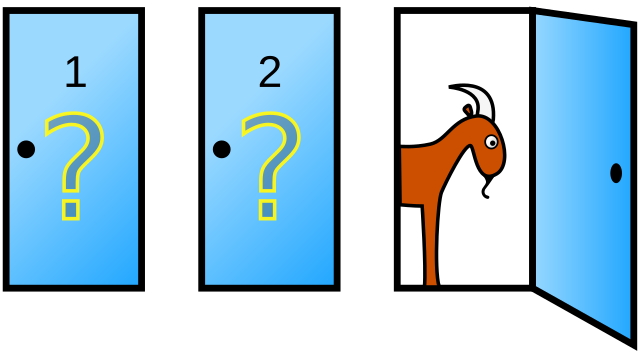

In [13]:
from PIL import Image
montey_hall_image = Image.open("montey_hall.png")
montey_hall_image

In [14]:
prompt="""
Run a simulation of the Monty Hall Problem with 1,000 trials.


Here's how this works as a reminder. In the Monty Hall Problem, you're on a game
show with three doors. Behind one is a car, and behind the others are goats. You
pick a door. The host, who knows what's behind the doors, opens a different door
to reveal a goat. Should you switch to the remaining unopened door?


The answer has always been a little difficult for me to understand when people
solve it with math - so please run a simulation with Python to show me what the
best strategy is.


Thank you!
"""

response = client.models.generate_content(
  model='gemini-2.0-flash',
  contents=[montey_hall_image, prompt],
  config=types.GenerateContentConfig(
    tools=[types.Tool(
      code_execution=types.ToolCodeExecution()
    )]
  )
)

display_code_execution_result(response)

---

After 1000 trials:
Switching doors win percentage: 66.10%
Staying with original door win percentage: 33.90%


---

The simulation results show that switching doors wins approximately 66% of the time, while staying with the original door wins approximately 34% of the time. This clearly demonstrates that switching doors is the better strategy in the Monty Hall Problem.


---

## Streaming

Streaming is compatible with code execution:

In [15]:
for chunk in client.models.generate_content_stream(
    model='gemini-2.0-flash',
    contents=[montey_hall_image, prompt],
    config=types.GenerateContentConfig(
      tools=[types.Tool(
        code_execution=types.ToolCodeExecution()
      )]
    )
):
  for part in chunk.candidates[0].content.parts:
    if part.text:
      print(part.text)
    if part.executable_code:
      print(part.executable_code)
    if part.code_execution_result:
      print(part.code_execution_result)
    if part.inline_data:
      print(part.inline_data)
    print('----------------------------------------')

code='import random\n\ndef monty_hall_simulation(num_trials=1000):\n    """\n    Simulates the Monty Hall problem to compare the effectiveness of switching\n    versus staying with the initial door choice.\n\n    Args:\n        num_trials (int): The number of simulations to run.\n\n    Returns:\n        tuple: A tuple containing the win percentages for staying and switching.\n    """\n\n    wins_staying = 0\n    wins_switching = 0\n\n    for _ in range(num_trials):\n        # Randomly assign the car to a door (0, 1, or 2)\n        winning_door = random.randint(0, 2)\n\n        # Player makes an initial choice\n        player_choice = random.randint(0, 2)\n\n        # Monty opens a door that is not the winning door and not the player\'s choice\n        monty_can_open = [i for i in range(3) if i != winning_door and i != player_choice]\n        monty_opens = random.choice(monty_can_open)\n\n        # Determine the remaining door for the switching strategy\n        remaining_door = [i for 

## Next Steps
### Useful API references:

Check the [Code execution documentation](https://ai.google.dev/gemini-api/docs/code-execution) for more details about the feature.

### Continue your discovery of the Gemini API

Learn how to control how the Gemini API can call your own functions using the [function calling](../quickstarts/Function_calling.ipynb) feature, or discover how to control the model output in [JSON](../quickstarts/JSON_mode.ipynb) or using an [Enum](../quickstarts/Enum.ipynb).